# Introduction

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from datetime import datetime

df = pd.read_excel("/Users/mac/Desktop/IDMC_Codebase/output/January_SummaryDATA_idmc_idus.xlsx")
df

,id,country,displacement_type,Disaster_Type,figure,event_name,sources,source_url,locations_name,Month
0,219931,Tanzania,Disaster,Flood,1500,Tanzania: Flood - Morogoro (Kilosa) - 27/12/2025,International Federation of the Red Cross (IFRC),NaN,"Kilosa, Morogoro, Coastal Zone, Tanzania",December
1,218966,Kenya,Conflict,NaN,1800,Kenya: Communal violence - Narok (Trans Mara S...,Kenya Red Cross Society,NaN,"Narok, Kenya",December
2,218658,Burundi,Disaster,Flood,41,Burundi: Flood - Bujumbura - 01/11/2025,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Mitakataka, Bubanza, Bujumbura, Burundi",November
3,218659,Burundi,Disaster,Flood,14,Burundi: Flood - Bujumbura - 01/11/2025,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Mitakataka, Bubanza, Bujumbura, Burundi",November
4,218654,Burundi,Disaster,Flood,72,Burundi: Flood - Bujumbura - 01/11/2025,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Kiramira, Cibitoke, Bujumbura, Burundi",November
...,...,...,...,...,...,...,...,...,...,...
1343,183194,Sudan,Conflict,NaN,2010,Sudan: Non-International armed conflict (NIAC)...,IOM Displacement Tracking Matrix (IOM DTM),NaN,"North Kordofan State, Sudan",January
1344,183195,Sudan,Conflict,NaN,11184,Sudan: Non-International armed conflict (NIAC)...,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Northern State, Sudan",January
1345,219998,Ethiopia,Conflict,NaN,28,Ethiopia: Unclear/Unknown - Western Tigray Reg...,IOM DTM Ethiopia,NaN,"Mai Kadra, Western Tigray, Tigray, Ethiopia; S...",January
1346,219999,Ethiopia,Disaster,Earthquake,11345,Ethiopia: Earthquake - Afar - 01/01/2025,IOM DTM Ethiopia,NaN,"Amibara, Zone 3, Afar Region, Ethiopia; Dulech...",January


## Temporal Analysis

### This Helps identify seasonal patterns or spikes in displacements — e.g., during rainy seasons or political unrest periods.

In [12]:

# Define your preferred order of months
month_order = ['January', 'February', 'March', 'April']

# Convert dates
df['displacement_start_date'] = pd.to_datetime(df['displacement_start_date'])
df['displacement_end_date'] = pd.to_datetime(df['displacement_end_date'])

# Create additional time columns
df['Year'] = df['displacement_start_date'].dt.year
df['Month_Name'] = df['displacement_start_date'].dt.strftime('%B')

# Set Month_Name as a categorical variable with manual order
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

# Group data
monthly_trend = df.groupby(['Year', 'Month_Name'])['figure'].sum().reset_index()

# Sort by year and month order
monthly_trend_sorted = monthly_trend.sort_values(by=['Year', 'Month_Name'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend_sorted, x='Month_Name', y='figure', hue='Year', palette='tab10')
plt.title("Monthly Displacement Trend")
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Number of Displacements")
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'displacement_start_date'

## Geographic Distribution

### Identifies hotspots of displacement regionally, useful for geographic targeting of humanitarian aid.

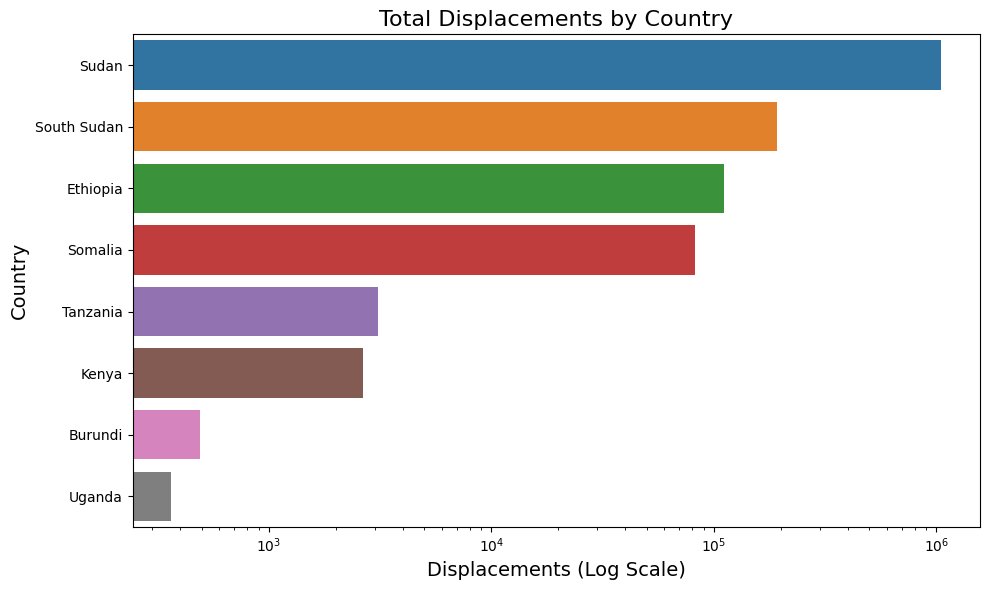

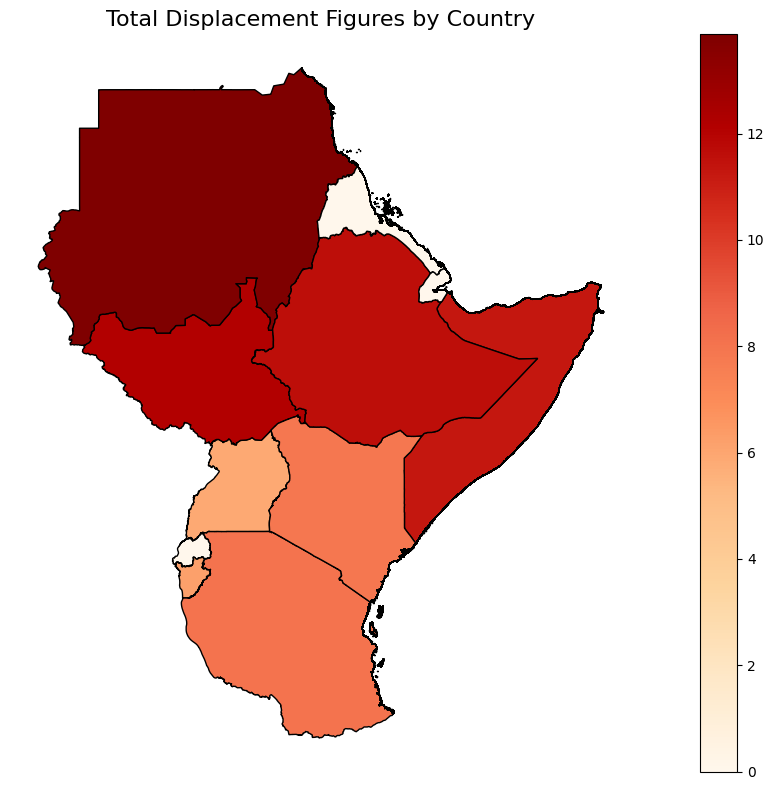

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

# Displacements by country (log-scaled bar plot)
country_figures = df.groupby('country')['figure'].sum().reset_index().sort_values(by='figure', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=country_figures, y='country', x='figure',hue='country', palette='tab10')
plt.xscale('log')  # Apply logarithmic scale
plt.title("Total Displacements by Country", fontsize=16)
plt.xlabel("Displacements", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.tight_layout()
plt.show()

# Aggregate affected people by country (again for mapping)
country_figures = df.groupby("country")["figure"].sum().reset_index()

# Load the shapefile
shapefile_path = '.././IDMC/Administrative0_Boundaries_ICPAC_Countries.shp'  # Adjust path as needed
geo_df = gpd.read_file(shapefile_path)

# Merge with shapefile
merged = geo_df.merge(country_figures, how='left', left_on='COUNTRY', right_on='country')
merged['figure'] = merged['figure'].fillna(0)

# Apply log scale for color classification (handle zeros with log1p)
merged['log_figure'] = np.log1p(merged['figure'])

# Plot the map
merged.plot(column='log_figure', cmap='OrRd', legend=True, edgecolor='black', figsize=(14, 8))
plt.title('Total Displacement Figures by Country', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()



## Displacement Type Comparison

### Understand what causes displacements most — critical for response planning and advocacy.

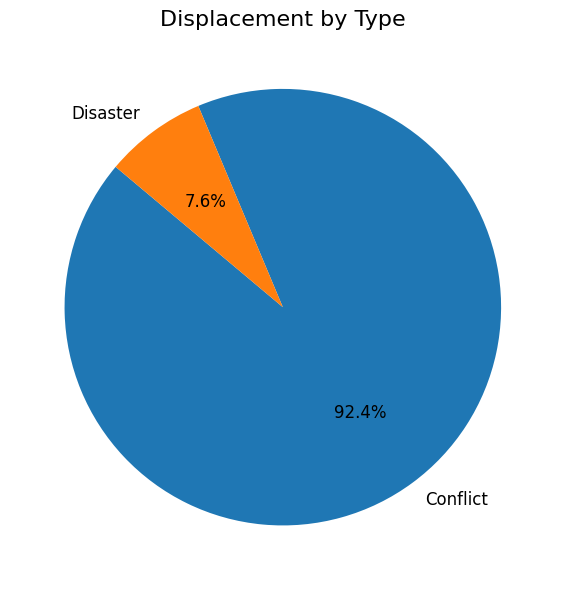

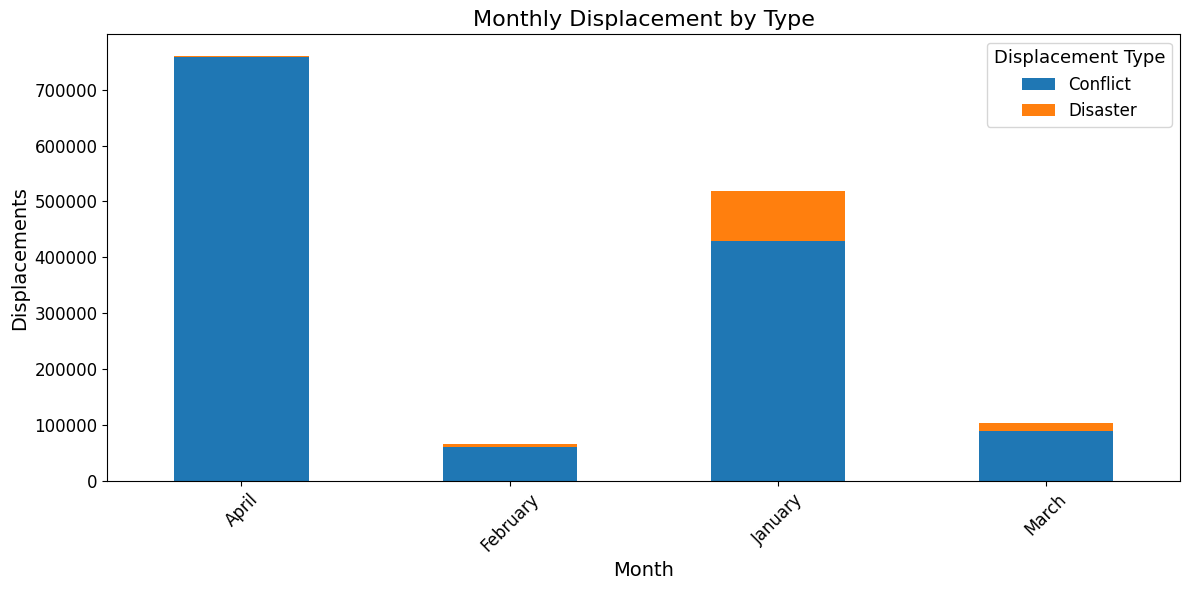

In [4]:

import matplotlib.pyplot as plt

# Pie Chart
type_summary = df.groupby('displacement_type')['figure'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(
    type_summary['figure'],
    labels=type_summary['displacement_type'],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}  # Increase label font size
)
plt.title("Displacement by Type", fontsize=16)  # Increase title font size
plt.tight_layout()
plt.show()

# Stacked Bar Chart
type_month = df.groupby(['Month', 'displacement_type'])['figure'].sum().unstack().fillna(0)
ax = type_month.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Monthly Displacement by Type", fontsize=16)
plt.ylabel("Displacements", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Displacement Type", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()



## Duration-Based Insights

### Measure how long displacement events last on average and how this varies by cause.

                   count       mean        std  min   25%   50%   75%   max
displacement_type                                                          
Conflict           111.0  22.594595  11.629413  0.0  13.0  27.0  30.0  42.0
Disaster            73.0  17.342466  14.182559  0.0   0.0  27.0  30.0  30.0


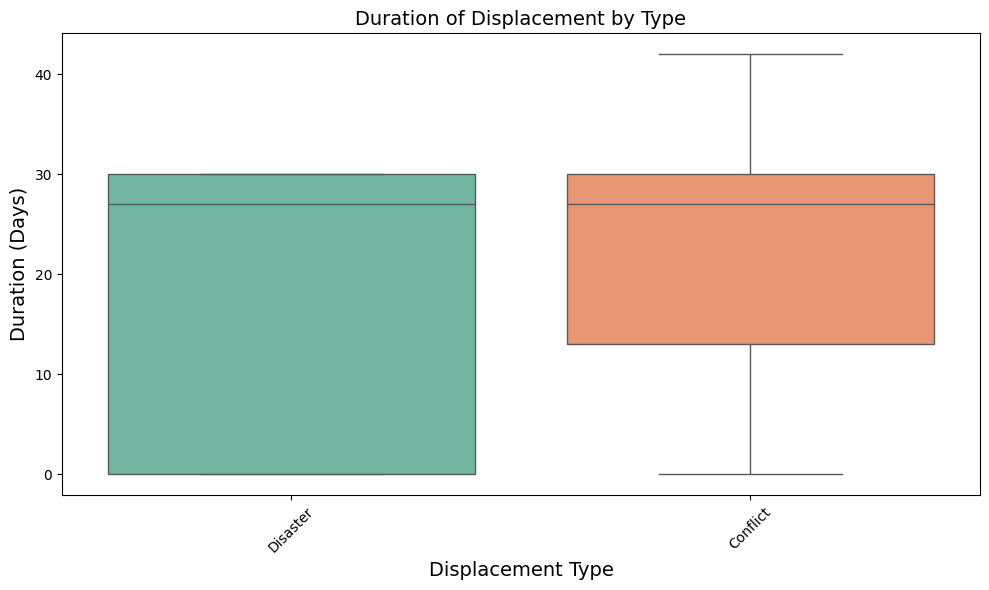

In [9]:
# Ensure the date columns are in datetime format
df['displacement_start_date'] = pd.to_datetime(df['displacement_start_date'], errors='coerce')
df['displacement_end_date'] = pd.to_datetime(df['displacement_end_date'], errors='coerce')

# Compute duration
df['Duration_Days'] = (df['displacement_end_date'] - df['displacement_start_date']).dt.days

# Optional: drop rows with missing duration (in case of invalid dates)
df = df.dropna(subset=['Duration_Days'])

# Summary by displacement type
duration_summary = df.groupby('displacement_type')['Duration_Days'].describe()
print(duration_summary)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='displacement_type', hue='displacement_type', y='Duration_Days', palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title("Duration of Displacement by Type", fontsize=14)
plt.xlabel("Displacement Type", fontsize=14)
plt.ylabel("Duration (Days)", fontsize=14)
plt.tight_layout()
plt.show()



## Event-Level Insights

### Useful for detailed case analysis or combining displacement data with other datasets (e.g., response funding, health outcomes).

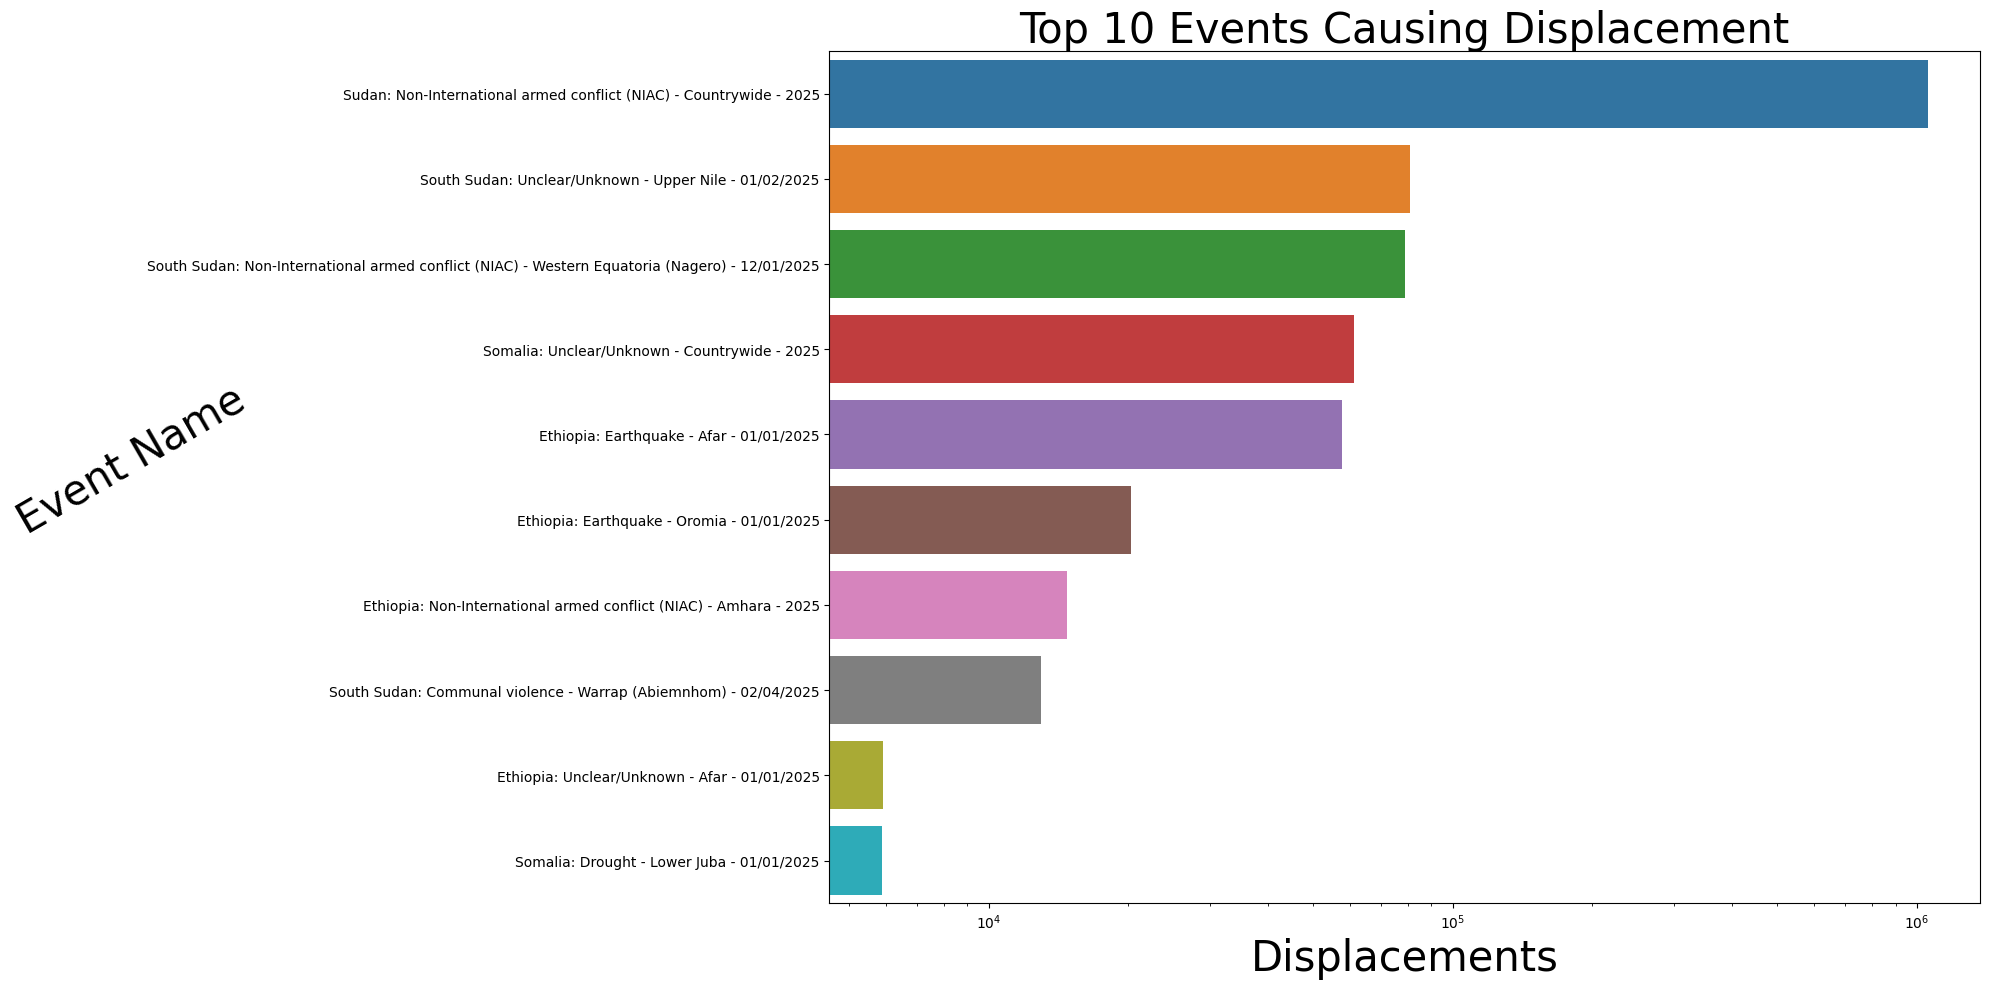

In [11]:
# top_events = df.groupby('event_name')['figure'].sum().sort_values(ascending=False).head(10).reset_index()

# plt.figure(figsize=(20, 10))
# sns.barplot(data=top_events, y='event_name', hue='event_name', x='figure', palette='tab10')
# plt.title("Top 10 Events Causing Displacement", fontsize=20)
# plt.xlabel("Displacements", fontsize=20)
# plt.ylabel("Event Name", fontsize=20)
# plt.tight_layout()
# plt.show()



import matplotlib.pyplot as plt
import seaborn as sns

top_events = df.groupby('event_name')['figure'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(data=top_events, y='event_name', hue='event_name', x='figure', palette='tab10')
plt.xscale('log')  # Apply log scale to make small values more visible
plt.title("Top 10 Events Causing Displacement", fontsize=30)
plt.xlabel("Displacements", fontsize=30)
plt.ylabel("Event Name", fontsize=30, rotation=30)
plt.legend([],[], frameon=False)  # Remove redundant legend if not needed
plt.tight_layout()
plt.show()



## Displacements To Capture Trends over Time

,id,country,iso3,latitude,longitude,centroid,role,displacement_type,qualifier,figure,...,standard_info_text,old_id,sources,source_url,locations_name,locations_coordinates,locations_accuracy,locations_type,displacement_occurred,created_at
0,219931,Tanzania,TZA,-6.902970,36.974548,"[-6.90297, 36.974548]",Recommended figure,Disaster,approximately,1500,...,"<b> Tanzania: 1,500 displacements (...",NaN,International Federation of the Red Cross (IFRC),NaN,"Kilosa, Morogoro, Coastal Zone, Tanzania","-6.90297, 36.974548",District/Zone/Department (ADM2),Origin,Displacement without preventive evacuations re...,2026-01-16T15:39:48.019335Z
1,218966,Kenya,KEN,-1.277940,35.477428,"[-1.27794, 35.477428]",Recommended figure,Conflict,more than or equal to,1800,...,"<b> Kenya: 1,800 displacements, 18 ...",NaN,Kenya Red Cross Society,NaN,"Narok, Kenya","-1.27794, 35.477428",State/Region/Province (ADM1),Origin,Displacement without preventive evacuations re...,2026-01-05T18:52:59.418838Z
2,218658,Burundi,BDI,-3.125321,29.369430,"[-3.125321167742962, 29.36943005140567]",Recommended figure,Disaster,total,41,...,"<b> Burundi: 41 displacements, 2...",NaN,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Mitakataka, Bubanza, Bujumbura, Burundi","-3.125321167742962, 29.36943005140567",County/City/town/Village/Woreda (ADM3),Origin,Displacement without preventive evacuations re...,2025-12-23T13:18:42.062350Z
3,218659,Burundi,BDI,-3.125321,29.369430,"[-3.125321167742962, 29.36943005140567]",Triangulation,Disaster,total,14,...,<b> Burundi: 14 displacements (d...,NaN,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Mitakataka, Bubanza, Bujumbura, Burundi","-3.125321167742962, 29.36943005140567",County/City/town/Village/Woreda (ADM3),Origin,NaN,2025-12-23T13:19:21.826845Z
4,218654,Burundi,BDI,-2.823364,29.160053,"[-2.8233635602657, 29.16005254535622]",Triangulation,Disaster,total,72,...,<b> Burundi: 72 displacements (d...,NaN,IOM Displacement Tracking Matrix (IOM DTM),NaN,"Kiramira, Cibitoke, Bujumbura, Burundi","-2.8233635602657, 29.16005254535622",County/City/town/Village/Woreda (ADM3),Origin,NaN,2025-12-23T13:18:41.810392Z


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5676 non-null   int64  
 1   country                  5676 non-null   object 
 2   iso3                     5676 non-null   object 
 3   latitude                 5676 non-null   float64
 4   longitude                5676 non-null   float64
 5   centroid                 5676 non-null   object 
 6   role                     5676 non-null   object 
 7   displacement_type        5676 non-null   object 
 8   qualifier                5676 non-null   object 
 9   figure                   5676 non-null   int64  
 10  displacement_date        5676 non-null   object 
 11  displacement_start_date  5676 non-null   object 
 12  displacement_end_date    5676 non-null   object 
 13  year                     5676 non-null   int64  
 14  event_id                

None

,id,latitude,longitude,figure,year,event_id,old_id,source_url
count,5676.000000,5676.000000,5676.000000,5.676000e+03,5676.000000,5676.000000,1569.000000,0.0
mean,123623.272375,5.111327,35.030350,2.045082e+04,2022.837385,20656.877555,43201.773104,NaN
std,63057.245337,6.213612,6.916607,1.734121e+05,2.042582,9498.097566,15214.629418,NaN
min,3379.000000,-10.832762,21.892096,1.000000e+00,2018.000000,453.000000,10486.000000,NaN
25%,56369.500000,-0.089425,29.789509,6.000000e+01,2021.000000,12189.000000,33350.000000,NaN
50%,135386.500000,4.865260,33.131409,4.265000e+02,2023.000000,20686.000000,42559.000000,NaN
75%,174842.500000,10.042525,40.912335,3.000000e+03,2024.000000,29214.000000,57068.000000,NaN
max,220270.000000,21.800501,50.808479,3.681297e+06,2025.000000,38996.000000,67604.000000,NaN


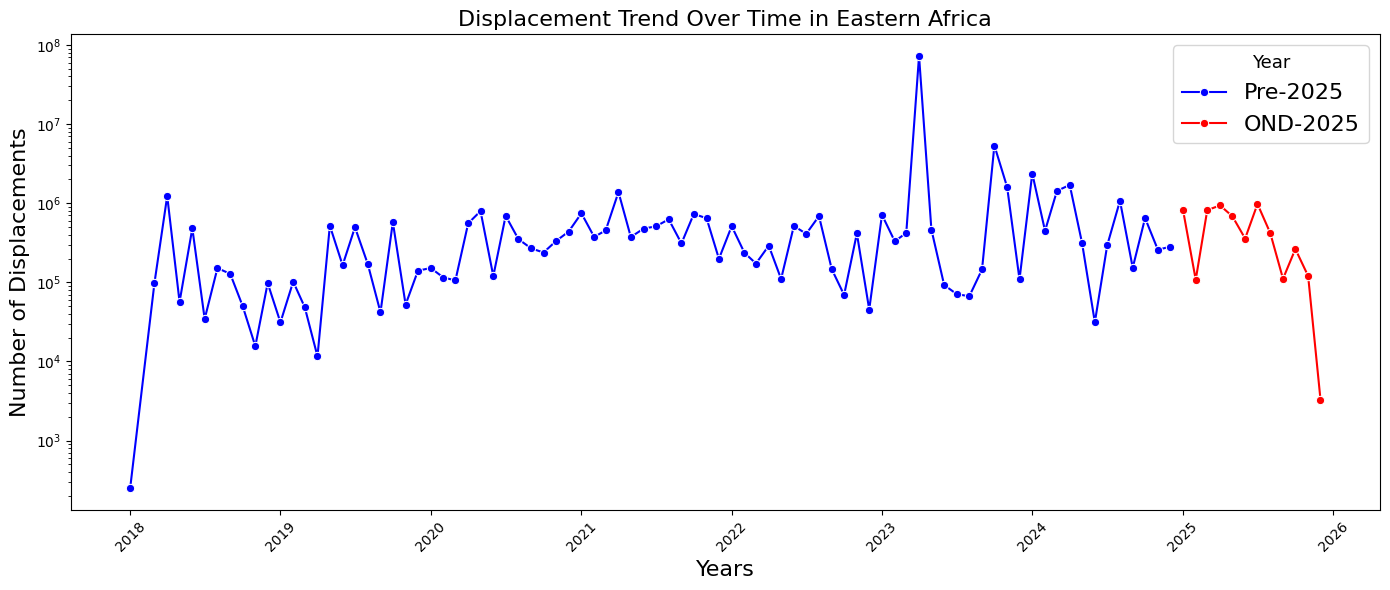

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from datetime import datetime

try:
    dff = pd.read_excel('./idmc_idus.xlsx')
    display(dff.head())
    display(dff.info())
    display(dff.describe())
except FileNotFoundError:
    print("Error: 'idmc_idus.xlsx' not found.")
    dff = None
except pd.errors.ParserError:
    print("Error: Could not parse the Excel file.")
    dff = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    dff = None


# Ensure datetime format
dff['displacement_start_date'] = pd.to_datetime(dff['displacement_start_date'])

# Create Year-Month time series and Year column
dff['YearMonth'] = dff['displacement_start_date'].dt.to_period('M').dt.to_timestamp()
dff['Year'] = dff['displacement_start_date'].dt.year

# Group displacement figures by Year-Month
monthly_trend = dff.groupby('YearMonth')['figure'].sum().reset_index()

# Remove zero or negative values to avoid log scale issues
monthly_trend = monthly_trend[monthly_trend['figure'] > 0]

# Merge with original DataFrame to retain Year information
monthly_trend = monthly_trend.merge(dff[['YearMonth', 'Year']].drop_duplicates(), on='YearMonth', how='left')

# Plot with log scale, separating 2025 (red) and pre-2025 (blue)
plt.figure(figsize=(14, 6))

# Plot pre-2025 data in blue
pre_2025 = monthly_trend[monthly_trend['Year'] < 2025]
sns.lineplot(data=pre_2025, x='YearMonth', y='figure', marker='o', color='blue', label='Pre-2025')

# Plot 2025 data in red
data_2025 = monthly_trend[monthly_trend['Year'] == 2025]
sns.lineplot(data=data_2025, x='YearMonth', y='figure', marker='o', color='red', label='OND-2025')

# Log scale and formatting
plt.yscale('log')
plt.title("Displacement Trend Over Time in Eastern Africa", fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.ylabel("Number of Displacements", fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=16, title='Year', title_fontsize='13')
plt.tight_layout()
plt.savefig('displacement_trend_red_2025_blue_pre.png')



Shapefile columns: Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')


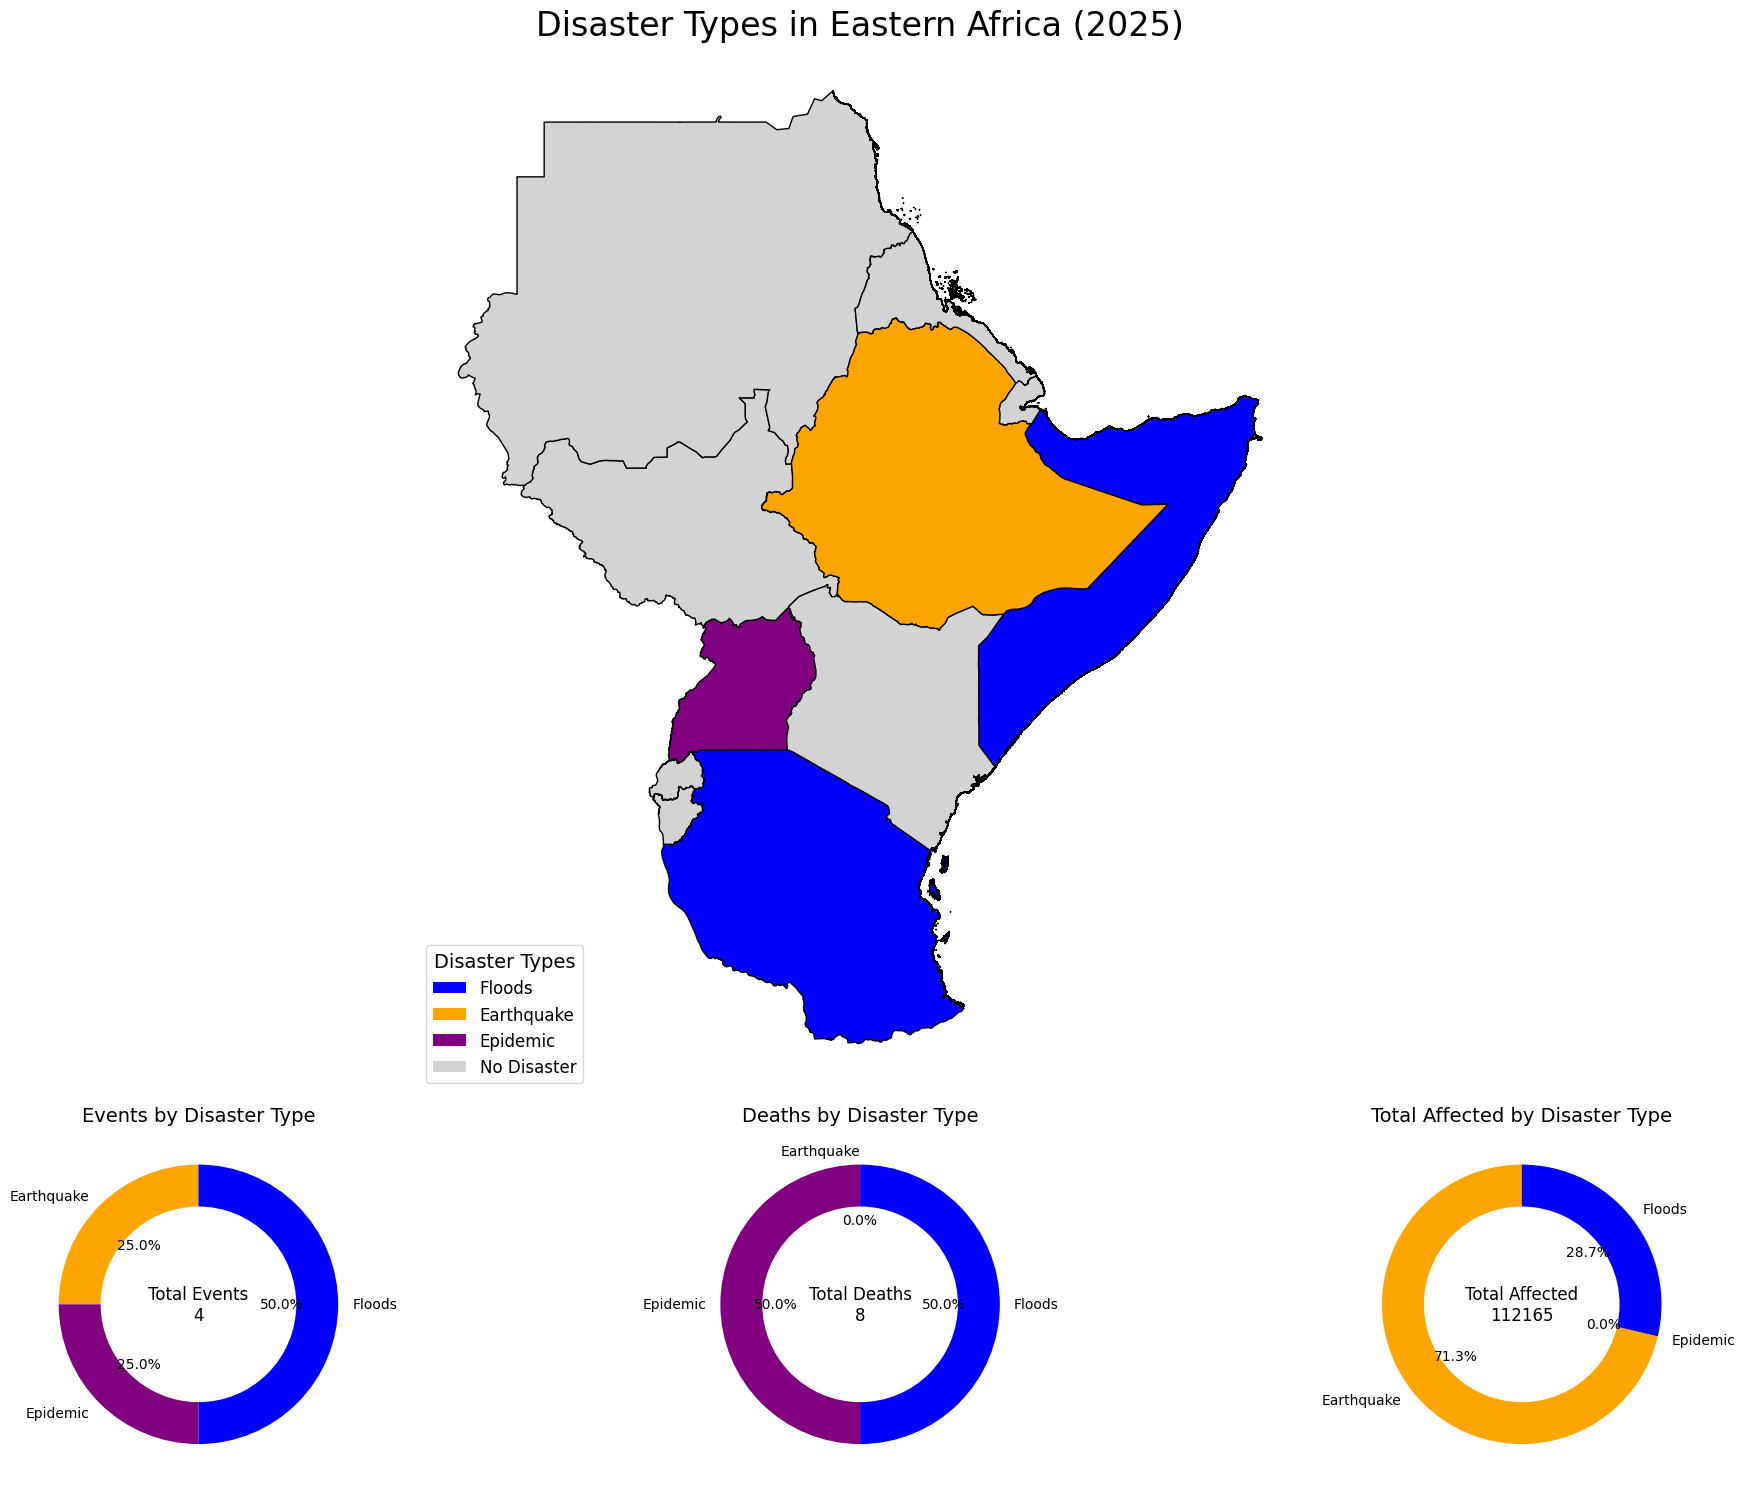

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Prepare the disaster data
data = [
    {"Country": "Somalia", "Disaster Type": "Floods", "Events": 1, "Deaths": 4, "Total Affected": 30000},
    {"Country": "Tanzania", "Disaster Type": "Floods", "Events": 1, "Deaths": 0, "Total Affected": 2165},
    {"Country": "Ethiopia", "Disaster Type": "Earthquake", "Events": 1, "Deaths": 0, "Total Affected": 80000},
    {"Country": "Uganda", "Disaster Type": "Epidemic", "Events": 1, "Deaths": 4, "Total Affected": 0}
]

df = pd.DataFrame(data)

# Load the shapefile for Eastern Africa
shapefile_path = './Administrative0_Boundaries_ICPAC_Countries.shp'
geo_df = gpd.read_file(shapefile_path)

# Print the columns to identify the correct country column
print("Shapefile columns:", geo_df.columns)

# Filter for Eastern Africa countries (adjust 'NAME' to the correct column name after inspection)
east_africa_countries = ["Somalia", "Tanzania", "Ethiopia", "Uganda", "Kenya", "Rwanda", "Burundi", "South Sudan", "Eritrea", "Djibouti", "Sudan"]
geo_df_east_africa = geo_df[geo_df['COUNTRY'].isin(east_africa_countries)]  

# Merge with disaster data (only countries with disasters will be colored)
merged = geo_df_east_africa.merge(df, how='left', left_on='COUNTRY', right_on='Country')  # Adjusted merge key

# Define color mapping for disaster types
disaster_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple",  # Used in donut charts, not map
    np.nan: "lightgray"  # For countries with no disasters
}
merged['Color'] = merged['Disaster Type'].map(disaster_colors).fillna("lightgray")

# Create the figure and axes
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 3, height_ratios=[3, 1], width_ratios=[1, 1, 1])

# Plot the map
ax_map = fig.add_subplot(gs[0, :])
merged.plot(ax=ax_map, color=merged['Color'], edgecolor='black')
ax_map.set_title("Disaster Types in Eastern Africa (2025)", fontsize=24)
ax_map.axis('off')

# Add legend for the map (bottom left)
legend_elements = [
    Patch(facecolor="blue", label="Floods"),
    Patch(facecolor="orange", label="Earthquake"),
    Patch(facecolor="purple", label="Epidemic"),
    Patch(facecolor="lightgray", label="No Disaster")
]
ax_map.legend(handles=legend_elements, title="Disaster Types", loc='lower left', fontsize=12, title_fontsize=14)

# Prepare data for donut charts
events_data = df.groupby('Disaster Type')['Events'].sum()
deaths_data = df.groupby('Disaster Type')['Deaths'].sum()
affected_data = df.groupby('Disaster Type')['Total Affected'].sum()

# Total values for the center of donut charts
total_events = events_data.sum()
total_deaths = deaths_data.sum()
total_affected = affected_data.sum()

# Donut chart colors (consistent with map where applicable)
chart_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple"
}

# Donut Chart 1: Events
ax1 = fig.add_subplot(gs[1, 0])
wedges, texts, autotexts = ax1.pie(events_data, labels=events_data.index, colors=[chart_colors[disaster] for disaster in events_data.index],
                                   autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax1.text(0, 0, f'Total Events\n{total_events}', ha='center', va='center', fontsize=12)
ax1.set_title("Events by Disaster Type", fontsize=14)

# Donut Chart 2: Deaths
ax2 = fig.add_subplot(gs[1, 1])
wedges, texts, autotexts = ax2.pie(deaths_data, labels=deaths_data.index, colors=[chart_colors[disaster] for disaster in deaths_data.index],
                                   autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax2.text(0, 0, f'Total Deaths\n{total_deaths}', ha='center', va='center', fontsize=12)
ax2.set_title("Deaths by Disaster Type", fontsize=14)

# Donut Chart 3: Total Affected
ax3 = fig.add_subplot(gs[1, 2])
wedges, texts, autotexts = ax3.pie(affected_data, labels=affected_data.index, colors=[chart_colors[disaster] for disaster in affected_data.index],
                                   autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax3.text(0, 0, f'Total Affected\n{total_affected}', ha='center', va='center', fontsize=12)
ax3.set_title("Total Affected by Disaster Type", fontsize=14)

plt.tight_layout()
plt.savefig('eastern_africa_disaster_map_donut_charts_fixed_name.png')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13016\2243714757.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)  # Reduced padding


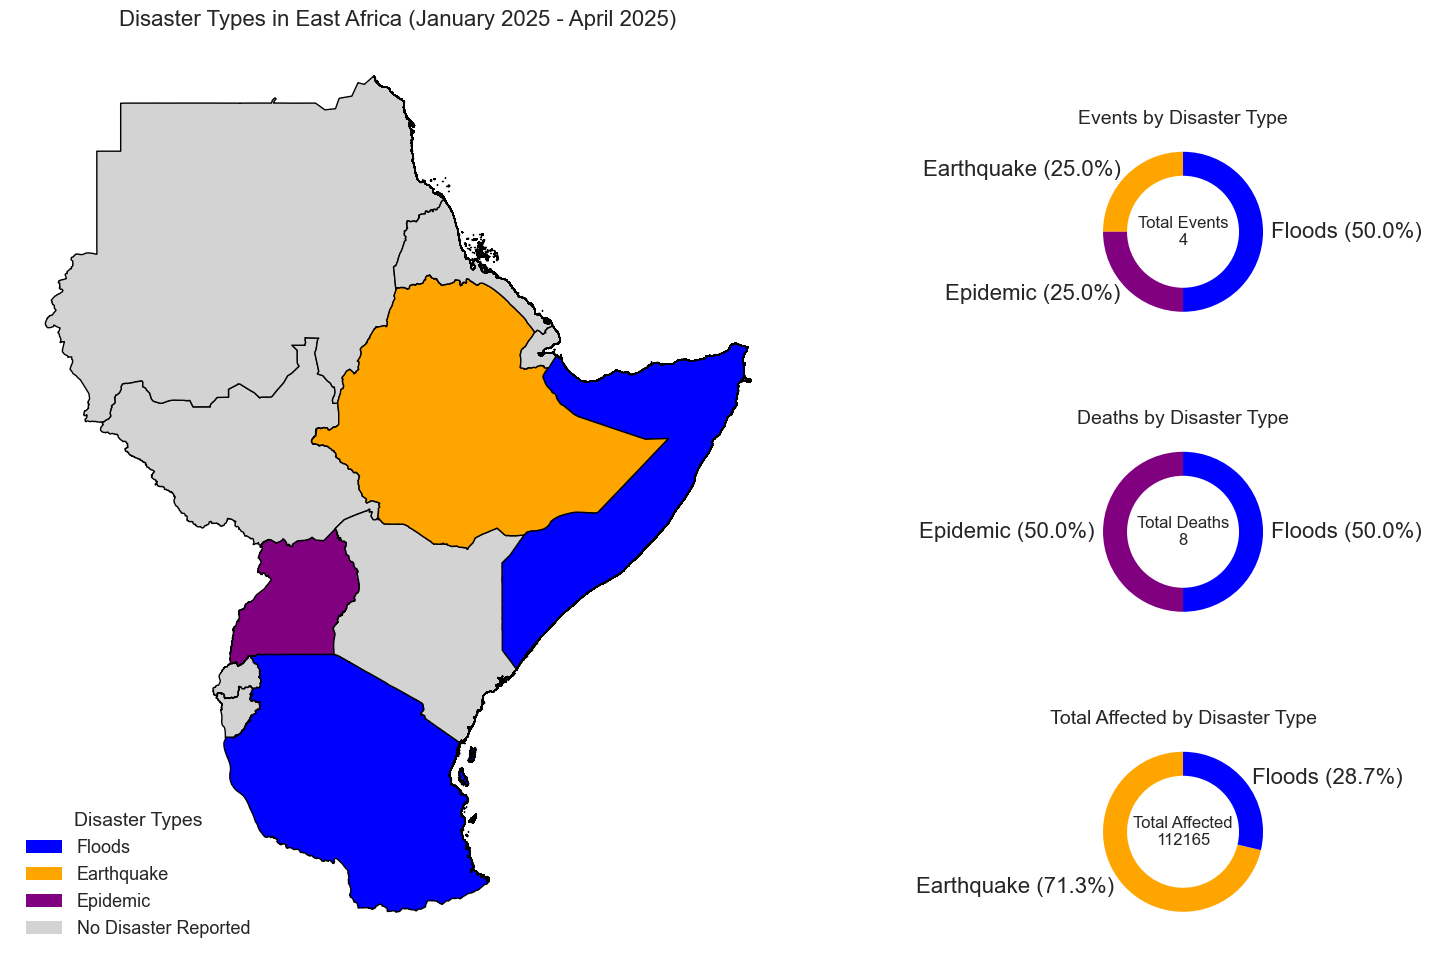

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch

# Prepare the disaster data
data = [
    {"Country": "Somalia", "Disaster Type": "Floods", "Events": 1, "Deaths": 4, "Total Affected": 30000},
    {"Country": "Tanzania", "Disaster Type": "Floods", "Events": 1, "Deaths": 0, "Total Affected": 2165},
    {"Country": "Ethiopia", "Disaster Type": "Earthquake", "Events": 1, "Deaths": 0, "Total Affected": 80000},
    {"Country": "Uganda", "Disaster Type": "Epidemic", "Events": 1, "Deaths": 4, "Total Affected": 0}
]

df = pd.DataFrame(data)

# Load the shapefile for Eastern Africa
shapefile_path = './Administrative0_Boundaries_ICPAC_Countries.shp'
geo_df = gpd.read_file(shapefile_path)

# Filter for Eastern Africa countries
east_africa_countries = ["Somalia", "Tanzania", "Ethiopia", "Uganda", "Kenya", "Rwanda", "Burundi", "South Sudan", "Eritrea", "Djibouti", "Sudan"]
geo_df_east_africa = geo_df[geo_df['COUNTRY'].isin(east_africa_countries)]

# Merge with disaster data (only countries with disasters will be colored)
merged = geo_df_east_africa.merge(df, how='left', left_on='COUNTRY', right_on='Country')

# Define color mapping for disaster types
disaster_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple",
    np.nan: "lightgray"  # For countries with no disasters
}
merged['Color'] = merged['Disaster Type'].map(disaster_colors).fillna("lightgray")

# Create the figure and axes with a new layout
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(3, 2, width_ratios=[2, 1], height_ratios=[1, 1, 1])  # Adjusted width_ratios

# Plot the map on the left, spanning all 3 rows
ax_map = fig.add_subplot(gs[:, 0])  # Span all rows, first column
merged.plot(ax=ax_map, color=merged['Color'], edgecolor='black')
ax_map.set_title("Disaster Types in East Africa (January 2025 - April 2025)", fontsize=16)
ax_map.axis('off')

# Add legend for the map (bottom left of the map)
legend_elements = [
    Patch(facecolor="blue", label="Floods"),
    Patch(facecolor="orange", label="Earthquake"),
    Patch(facecolor="purple", label="Epidemic"),
    Patch(facecolor="lightgray", label="No Disaster Reported")
]
ax_map.legend(handles=legend_elements, title="Disaster Types", loc='lower left', fontsize=13, title_fontsize=14)

# Prepare data for donut charts
events_data = df.groupby('Disaster Type')['Events'].sum()
deaths_data = df.groupby('Disaster Type')['Deaths'].sum()
affected_data = df.groupby('Disaster Type')['Total Affected'].sum()

# Total values for the center of donut charts
total_events = events_data.sum()
total_deaths = deaths_data.sum()
total_affected = affected_data.sum()

# Donut chart colors (consistent with map)
chart_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple"
}

# Function to create custom labels with name and percentage
def create_labels(data):
    total = data.sum()
    return [f"{disaster} ({data[disaster]/total*100:.1f}%)" for disaster in data.index]

# Function to filter non-zero data and prepare labels and colors
def prepare_donut_data(data, colors_dict):
    # Filter out zero values
    non_zero_data = data[data > 0]
    # Create labels for non-zero data
    labels = create_labels(non_zero_data)
    # Get colors for non-zero data
    colors = [colors_dict[disaster] for disaster in non_zero_data.index]
    return non_zero_data, labels, colors

# Donut Chart 1: Events (right column, top row, shifted left)
ax1 = fig.add_axes([0.65, 0.65, 0.2, 0.2])  # [left, bottom, width, height]
events_non_zero, events_labels, events_colors = prepare_donut_data(events_data, chart_colors)
if len(events_non_zero) > 0:
    wedges, texts = ax1.pie(
        events_non_zero, 
        labels=events_labels, 
        colors=events_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax1.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax1.text(0, 0, f'Total Events\n{total_events}', ha='center', va='center', fontsize=12)
ax1.set_title("Events by Disaster Type", fontsize=14)

# Donut Chart 2: Deaths (right column, middle row, shifted left)
ax2 = fig.add_axes([0.65, 0.35, 0.2, 0.2])  # Adjusted left position
deaths_non_zero, deaths_labels, deaths_colors = prepare_donut_data(deaths_data, chart_colors)
if len(deaths_non_zero) > 0:
    wedges, texts = ax2.pie(
        deaths_non_zero, 
        labels=deaths_labels, 
        colors=deaths_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax2.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax2.text(0, 0, f'Total Deaths\n{total_deaths}', ha='center', va='center', fontsize=12)
ax2.set_title("Deaths by Disaster Type", fontsize=14)

# Donut Chart 3: Total Affected (right column, bottom row, shifted left)
ax3 = fig.add_axes([0.65, 0.05, 0.2, 0.2])  # [left, bottom, width, height]
affected_non_zero, affected_labels, affected_colors = prepare_donut_data(affected_data, chart_colors)
if len(affected_non_zero) > 0:
    wedges, texts = ax3.pie(
        affected_non_zero, 
        labels=affected_labels, 
        colors=affected_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax3.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax3.text(0, 0, f'Total Affected\n{total_affected}', ha='center', va='center', fontsize=12)
ax3.set_title("Total Affected by Disaster Type", fontsize=14)

plt.tight_layout(pad=2.0)  # Reduced padding
plt.savefig('eastern_africa_disaster_map_donut_charts_repositioned.png', dpi=300, bbox_inches='tight')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13016\3587906595.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


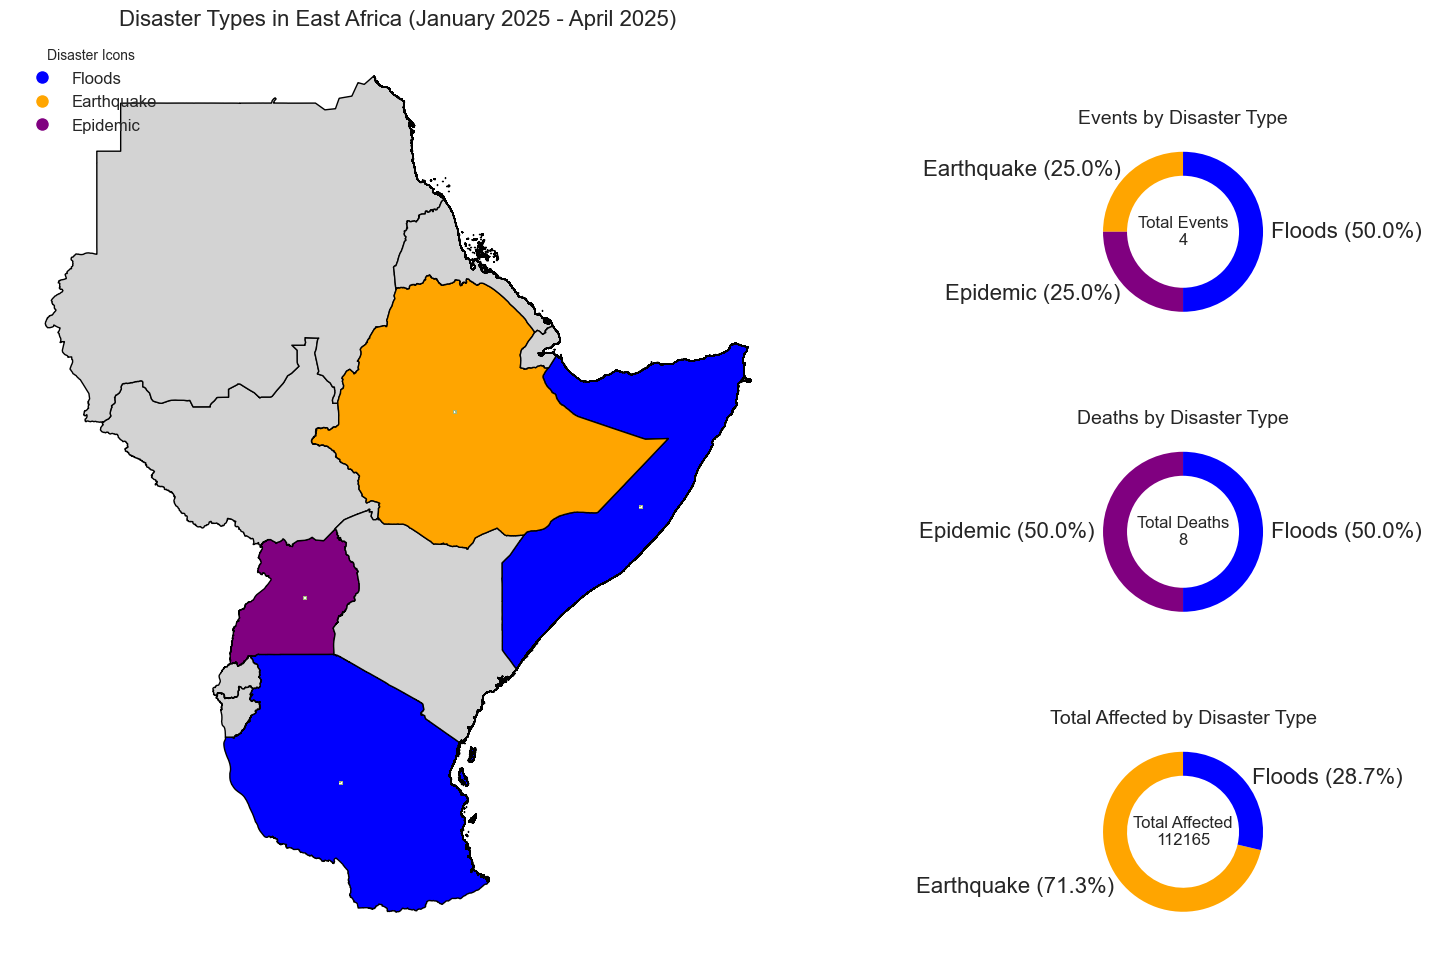

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib.lines import Line2D

# Prepare the disaster data
data = [
    {"Country": "Somalia", "Disaster Type": "Floods", "Events": 1, "Deaths": 4, "Total Affected": 30000},
    {"Country": "Tanzania", "Disaster Type": "Floods", "Events": 1, "Deaths": 0, "Total Affected": 2165},
    {"Country": "Ethiopia", "Disaster Type": "Earthquake", "Events": 1, "Deaths": 0, "Total Affected": 80000},
    {"Country": "Uganda", "Disaster Type": "Epidemic", "Events": 1, "Deaths": 4, "Total Affected": 0}
]

df = pd.DataFrame(data)

# Load the shapefile for Eastern Africa
shapefile_path = './Administrative0_Boundaries_ICPAC_Countries.shp'
geo_df = gpd.read_file(shapefile_path)

# Filter for Eastern Africa countries
east_africa_countries = ["Somalia", "Tanzania", "Ethiopia", "Uganda", "Kenya", "Rwanda", "Burundi", "South Sudan", "Eritrea", "Djibouti", "Sudan"]
geo_df_east_africa = geo_df[geo_df['COUNTRY'].isin(east_africa_countries)]

# Merge with disaster data
merged = geo_df_east_africa.merge(df, how='left', left_on='COUNTRY', right_on='Country')

# Define color mapping for disaster types
disaster_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple",
    np.nan: "lightgray"  # For countries with no disasters
}
merged['Color'] = merged['Disaster Type'].map(disaster_colors).fillna("lightgray")

# Compute coordinates for icons
merged['coords'] = merged['geometry'].representative_point().apply(lambda p: (p.x, p.y))

# Define a function to add an icon at a location
def add_icon(ax, x, y, icon_path, zoom=0.5):
    icon_img = mpimg.imread(icon_path)
    imagebox = OffsetImage(icon_img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Map icon paths for disaster types
icon_paths = {
    "Floods": "../IDMC/Flood_icon.png",
    "Earthquake": "../IDMC/Earthquake_icon.png",
    "Epidemic": "../IDMC/Epidemic_icon.png"
}

# Create the figure and axes
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(3, 2, width_ratios=[2, 1], height_ratios=[1, 1, 1])
ax_map = fig.add_subplot(gs[:, 0])

# Plot the map
merged.plot(ax=ax_map, color=merged['Color'], edgecolor='black')
ax_map.set_title("Disaster Types in East Africa (January 2025 - April 2025)", fontsize=16)
ax_map.axis('off')

# Add disaster icons
for _, row in merged.iterrows():
    disaster_type = row['Disaster Type']
    if pd.notna(disaster_type) and disaster_type in icon_paths:
        x, y = row['coords']
        add_icon(ax_map, x, y, icon_paths[disaster_type], zoom=0.08)

# Add legend for disaster colors
legend_elements = [
    Patch(facecolor="blue", label="Floods"),
    Patch(facecolor="orange", label="Earthquake"),
    Patch(facecolor="purple", label="Epidemic"),
    Patch(facecolor="lightgray", label="No Disaster Reported")
]
ax_map.legend(handles=legend_elements, title="Disaster Types", loc='lower left', fontsize=13, title_fontsize=14)

# Add legend for icons (optional visual representation)
icon_legend = [
    Line2D([0], [0], marker='o', color='w', label='Floods', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Earthquake', markerfacecolor='orange', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Epidemic', markerfacecolor='purple', markersize=10)
]
ax_map.legend(handles=icon_legend, title="Disaster Icons", loc='upper left', fontsize=12)

# Prepare data for donut charts
events_data = df.groupby('Disaster Type')['Events'].sum()
deaths_data = df.groupby('Disaster Type')['Deaths'].sum()
affected_data = df.groupby('Disaster Type')['Total Affected'].sum()

total_events = events_data.sum()
total_deaths = deaths_data.sum()
total_affected = affected_data.sum()

chart_colors = {
    "Floods": "blue",
    "Earthquake": "orange",
    "Epidemic": "purple"
}

def create_labels(data):
    total = data.sum()
    return [f"{disaster} ({data[disaster]/total*100:.1f}%)" for disaster in data.index]

def prepare_donut_data(data, colors_dict):
    non_zero_data = data[data > 0]
    labels = create_labels(non_zero_data)
    colors = [colors_dict[disaster] for disaster in non_zero_data.index]
    return non_zero_data, labels, colors

# Donut Chart 1: Events
ax1 = fig.add_axes([0.65, 0.65, 0.2, 0.2])
events_non_zero, events_labels, events_colors = prepare_donut_data(events_data, chart_colors)
if len(events_non_zero) > 0:
    wedges, texts = ax1.pie(
        events_non_zero, 
        labels=events_labels, 
        colors=events_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax1.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax1.text(0, 0, f'Total Events\n{total_events}', ha='center', va='center', fontsize=12)
ax1.set_title("Events by Disaster Type", fontsize=14)

# Donut Chart 2: Deaths
ax2 = fig.add_axes([0.65, 0.35, 0.2, 0.2])
deaths_non_zero, deaths_labels, deaths_colors = prepare_donut_data(deaths_data, chart_colors)
if len(deaths_non_zero) > 0:
    wedges, texts = ax2.pie(
        deaths_non_zero, 
        labels=deaths_labels, 
        colors=deaths_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax2.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax2.text(0, 0, f'Total Deaths\n{total_deaths}', ha='center', va='center', fontsize=12)
ax2.set_title("Deaths by Disaster Type", fontsize=14)

# Donut Chart 3: Affected
ax3 = fig.add_axes([0.65, 0.05, 0.2, 0.2])
affected_non_zero, affected_labels, affected_colors = prepare_donut_data(affected_data, chart_colors)
if len(affected_non_zero) > 0:
    wedges, texts = ax3.pie(
        affected_non_zero, 
        labels=affected_labels, 
        colors=affected_colors,
        startangle=90, 
        wedgeprops=dict(width=0.3),
        textprops=dict(fontsize=16)
    )
else:
    ax3.text(0, 0, 'No Data', ha='center', va='center', fontsize=12)
ax3.text(0, 0, f'Total Affected\n{total_affected}', ha='center', va='center', fontsize=12)
ax3.set_title("Total Affected by Disaster Type", fontsize=14)

plt.tight_layout(pad=2.0)
plt.savefig('eastern_africa_disaster_map_with_icons.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8804\3627801799.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


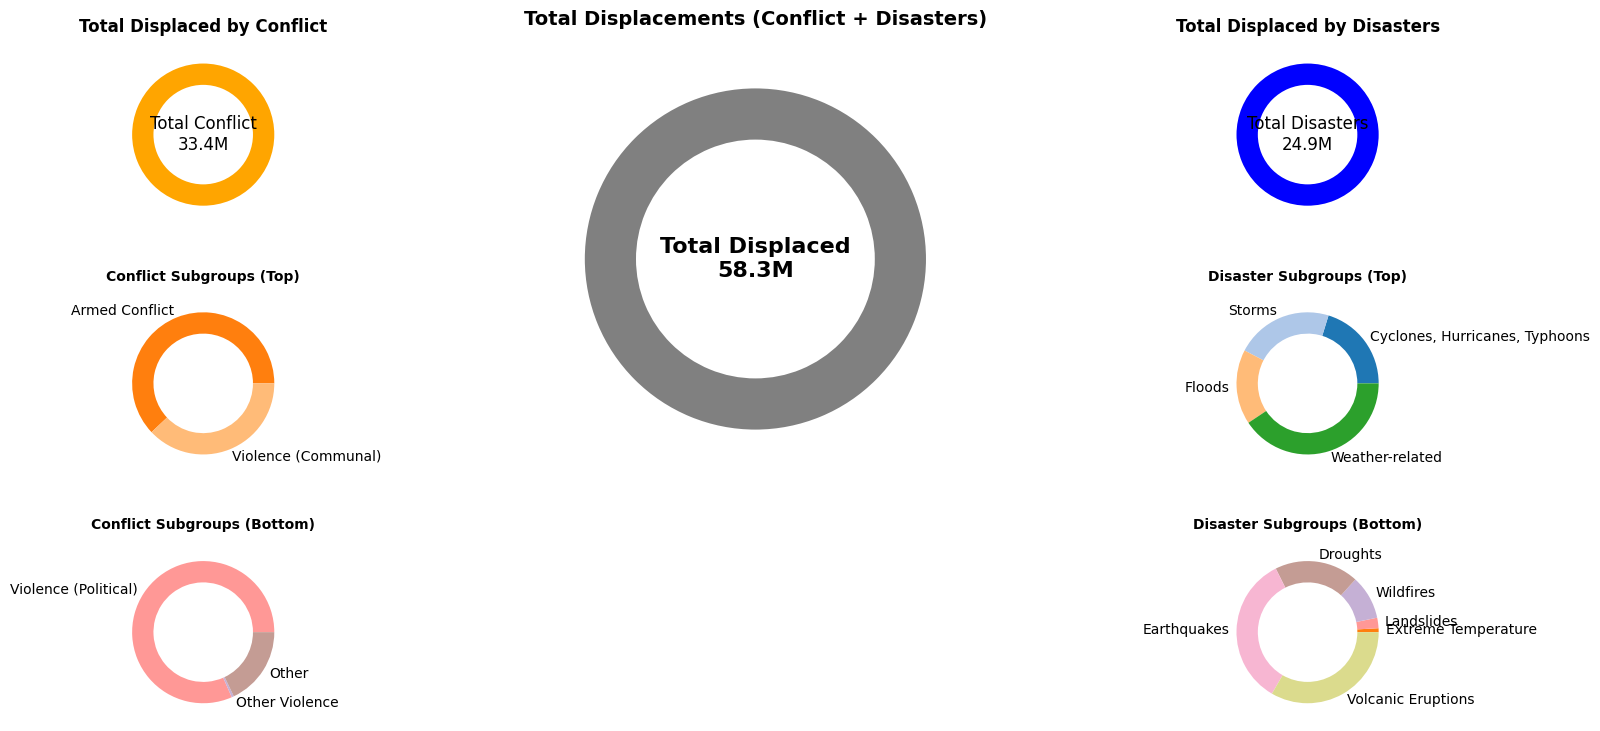

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
total_displaced = 58.3e6  # Total displaced (33.4M conflict + 24.9M disasters)

# Conflict data (left side)
conflict_total = 33.4e6
conflict_data = {
    "Armed Conflict": 8.5e6,
    "Violence (Communal)": 5.2e6,
    "Violence (Political)": 2.7e6,
    "Other Violence": 16600,
    "Other": 39700,
    "Other": 592900
}
conflict_values = list(conflict_data.values())
conflict_labels = list(conflict_data.keys())

# Disaster data (right side)
disaster_total = 24.9e6
disaster_data = {
    "Cyclones, Hurricanes, Typhoons": 11.9e6,
    "Storms": 13e6,
    "Floods": 10e6,
    "Weather-related": 23.9e6,
    "Extreme Temperature": 24500,
    "Landslides": 65800,
    "Wildfires": 276700,
    "Droughts": 528500,
    "Earthquakes": 947000,
    "Volcanic Eruptions": 922500
}
disaster_values = list(disaster_data.values())
disaster_labels = list(disaster_data.keys())

# Normalize data for percentages (using unique values for conflict "Other")
conflict_unique = {k: v for k, v in conflict_data.items() if k == "Other" or list(conflict_data.values()).count(v) == 1}
conflict_values_unique = [v for k, v in conflict_unique.items()]
conflict_labels_unique = [k for k, v in conflict_unique.items()]

disaster_unique = {k: v for k, v in disaster_data.items() if list(disaster_data.values()).count(v) == 1}
disaster_values_unique = [v for k, v in disaster_unique.items()]
disaster_labels_unique = [k for k, v in disaster_unique.items()]

# Create figure and axes
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(4, 3, width_ratios=[1, 2, 1], height_ratios=[1, 1, 1, 1], wspace=0.3, hspace=0.4)

# Central large donut chart (Total Displaced)
ax_center = fig.add_subplot(gs[1:3, 1])
ax_center.pie([total_displaced], labels=[''], colors=['gray'], wedgeprops=dict(width=0.3))
ax_center.text(0, 0, f'Total Displaced\n{total_displaced / 1e6:.1f}M', ha='center', va='center', fontsize=16, fontweight='bold')
ax_center.set_title("Total Displacements (Conflict + Disasters)", fontsize=14, fontweight='bold', pad=15)
title_center = ax_center.set_title("Total Displacements (Conflict + Disasters)", fontsize=14, fontweight='bold', pad=15)
title_center.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

# Left side: Conflict total and subgroups
ax_conflict_total = fig.add_subplot(gs[1, 0])
ax_conflict_total.pie([conflict_total], labels=[''], colors=['orange'], wedgeprops=dict(width=0.3))
ax_conflict_total.text(0, 0, f'Total Conflict\n{conflict_total / 1e6:.1f}M', ha='center', va='center', fontsize=12)
title_conflict_total = ax_conflict_total.set_title("Total Displaced by Conflict", fontsize=12, fontweight='bold', pad=10)
title_conflict_total.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

ax_conflict1 = fig.add_subplot(gs[2, 0])
ax_conflict1.pie(conflict_values_unique[:2], labels=conflict_labels_unique[:2], colors=['#ff7f0e', '#ffbb78'], wedgeprops=dict(width=0.3))
ax_conflict1.set_title("Conflict Subgroups (Top)", fontsize=10, fontweight='bold', pad=10)
title_conflict1 = ax_conflict1.set_title("Conflict Subgroups (Top)", fontsize=10, fontweight='bold', pad=10)
title_conflict1.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

ax_conflict2 = fig.add_subplot(gs[3, 0])
ax_conflict2.pie(conflict_values_unique[2:], labels=conflict_labels_unique[2:], colors=['#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2'], wedgeprops=dict(width=0.3))
ax_conflict2.set_title("Conflict Subgroups (Bottom)", fontsize=10, fontweight='bold', pad=10)
title_conflict2 = ax_conflict2.set_title("Conflict Subgroups (Bottom)", fontsize=10, fontweight='bold', pad=10)
title_conflict2.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

# Right side: Disaster total and subgroups
ax_disaster_total = fig.add_subplot(gs[1, 2])
ax_disaster_total.pie([disaster_total], labels=[''], colors=['blue'], wedgeprops=dict(width=0.3))
ax_disaster_total.text(0, 0, f'Total Disasters\n{disaster_total / 1e6:.1f}M', ha='center', va='center', fontsize=12)
title_disaster_total = ax_disaster_total.set_title("Total Displaced by Disasters", fontsize=12, fontweight='bold', pad=10)
title_disaster_total.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

ax_disaster1 = fig.add_subplot(gs[2, 2])
ax_disaster1.pie(disaster_values_unique[:4], labels=disaster_labels_unique[:4], colors=['#1f77b4', '#aec7e8', '#ffbb78', '#2ca02c'], wedgeprops=dict(width=0.3))
ax_disaster1.set_title("Disaster Subgroups (Top)", fontsize=10, fontweight='bold', pad=10)
title_disaster1 = ax_disaster1.set_title("Disaster Subgroups (Top)", fontsize=10, fontweight='bold', pad=10)
title_disaster1.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

ax_disaster2 = fig.add_subplot(gs[3, 2])
ax_disaster2.pie(disaster_values_unique[4:], labels=disaster_labels_unique[4:], colors=['#ff7f0e', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d'], wedgeprops=dict(width=0.3))
ax_disaster2.set_title("Disaster Subgroups (Bottom)", fontsize=10, fontweight='bold', pad=10)
title_disaster2 = ax_disaster2.set_title("Disaster Subgroups (Bottom)", fontsize=10, fontweight='bold', pad=10)
title_disaster2.set_bbox(dict(facecolor='none', edgecolor='none', boxstyle='round', linestyle='-', linewidth=1))

plt.tight_layout()
plt.savefig('displacements_breakdown_10_donut_charts.png')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13016\1697703602.py:250: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])


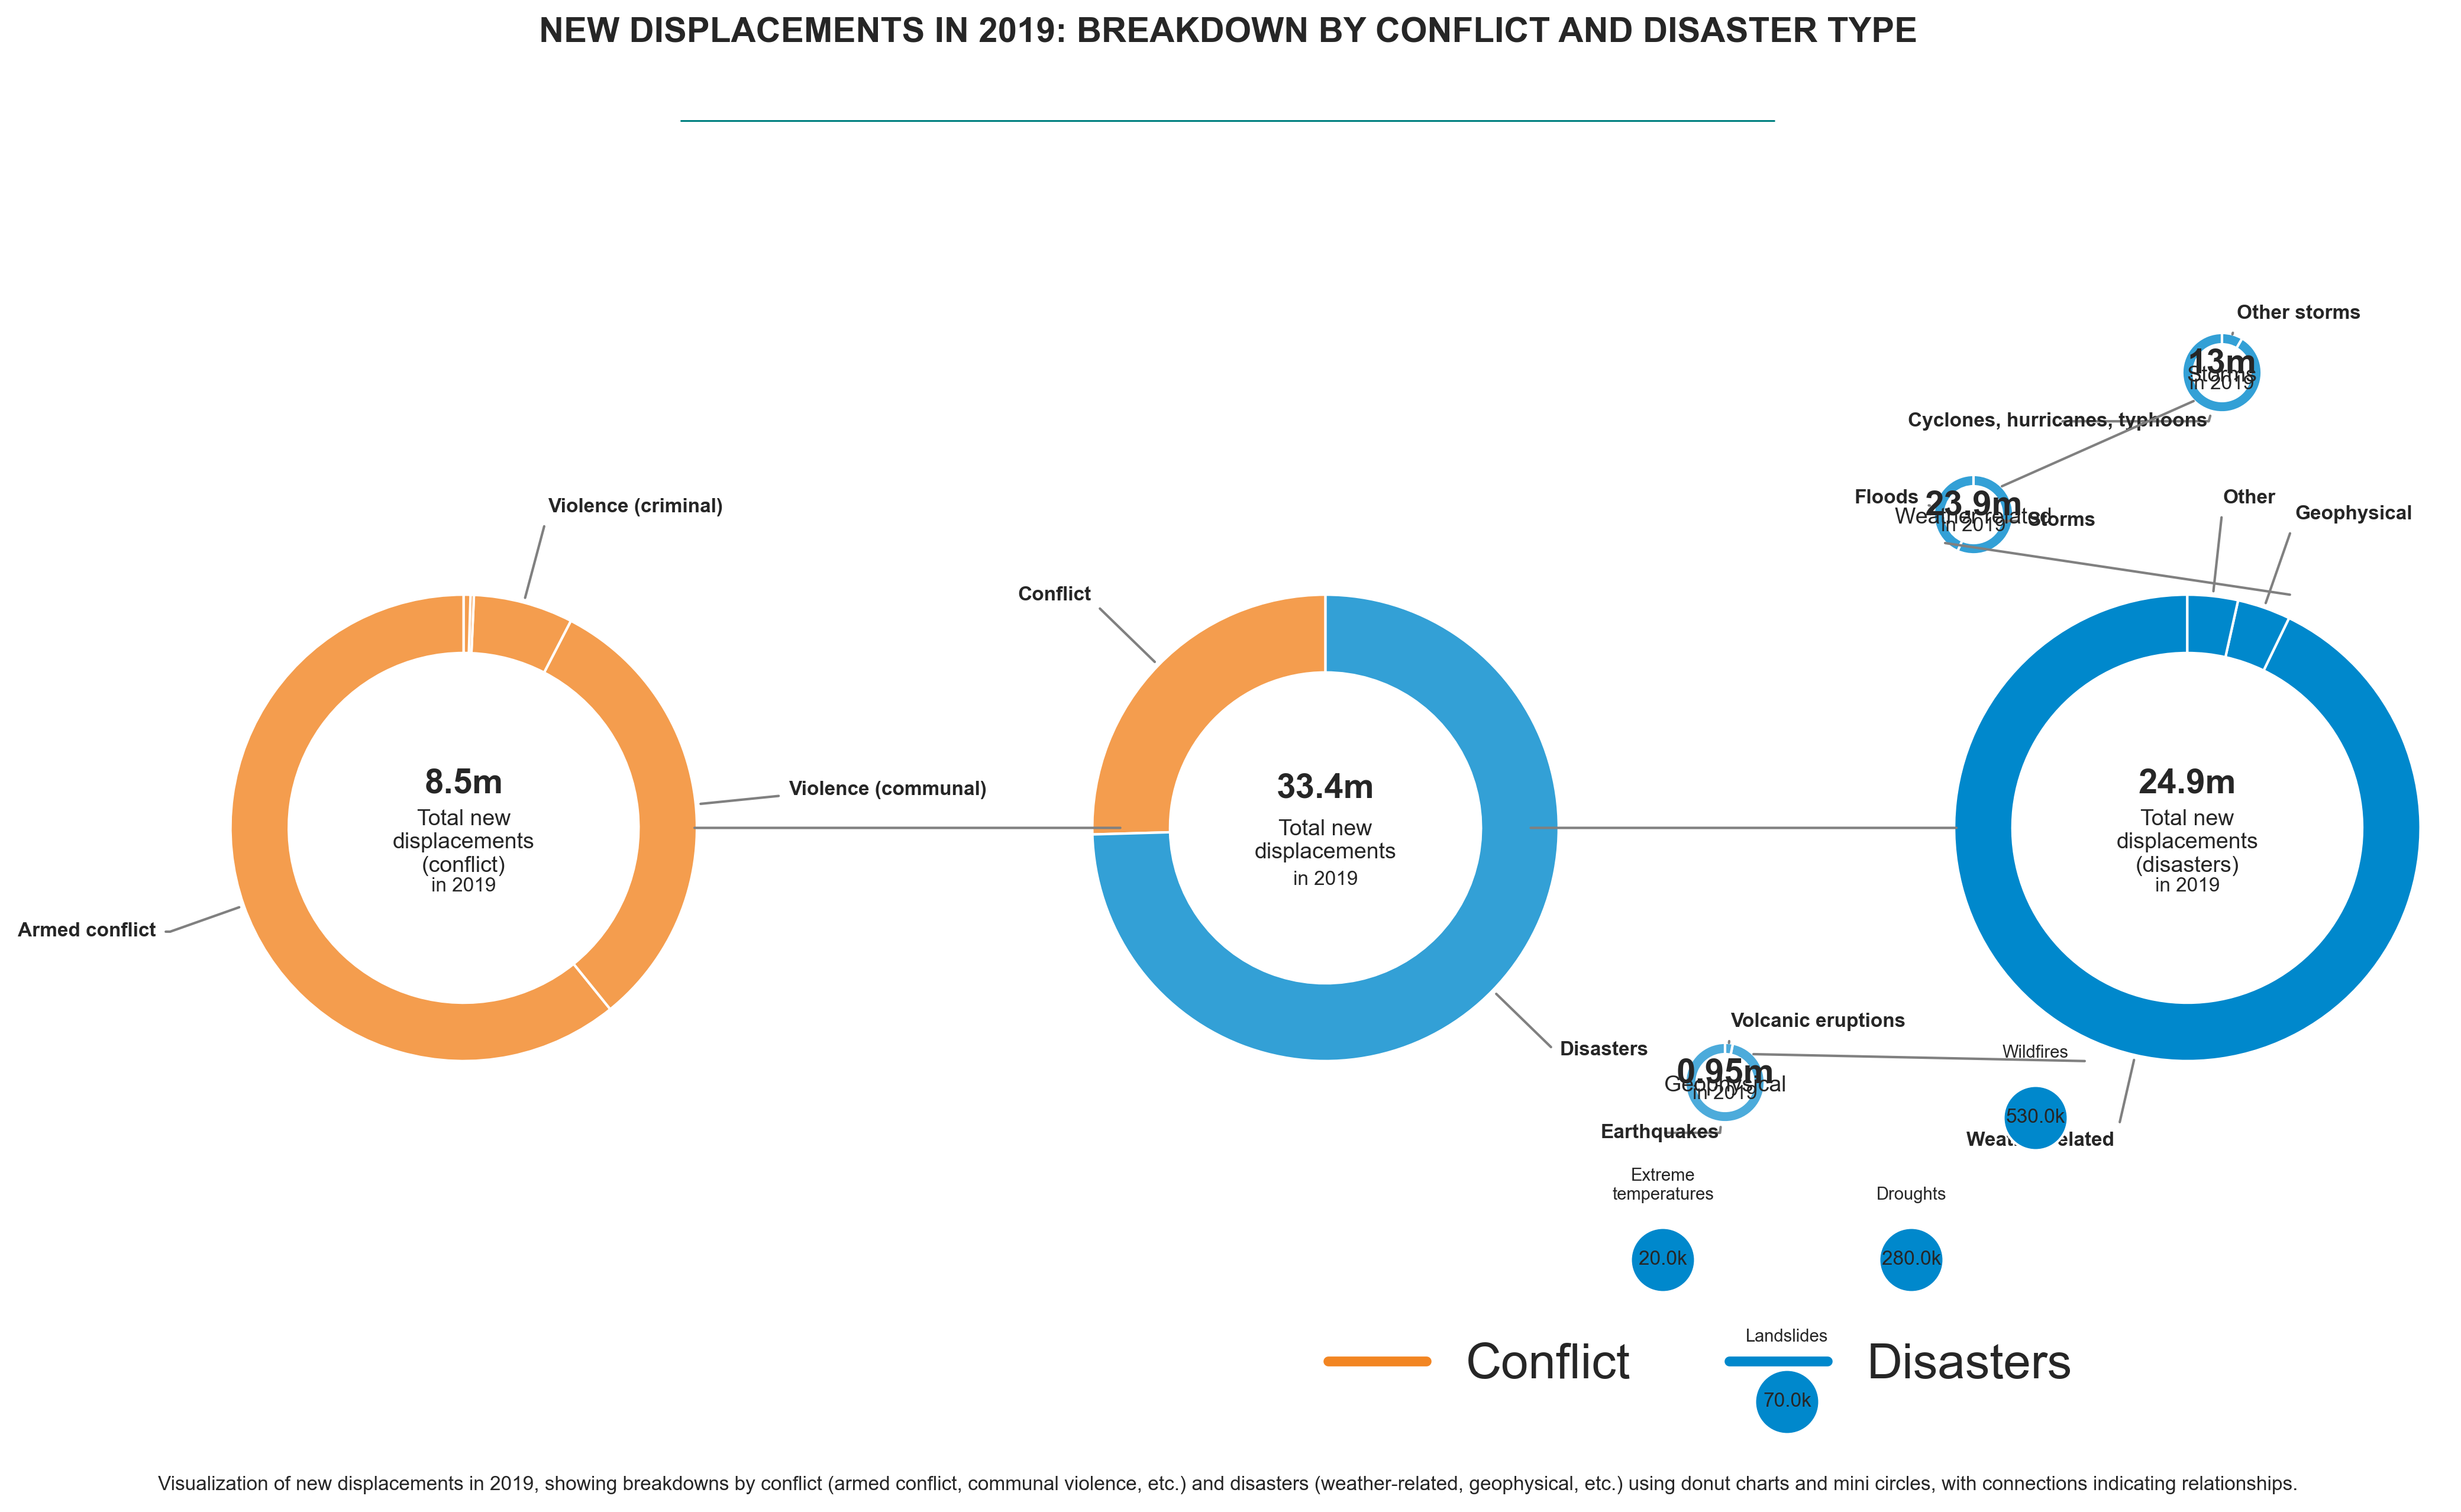

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as mcolors

# Set the figure size and style
plt.figure(figsize=(14, 8), dpi=300)
plt.style.use('seaborn-v0_8-whitegrid')

# Define color schemes
conflict_color = '#F28522'  # Orange
disaster_color = '#0088CC'  # Blue

# Data for the charts (rounded for clarity)
total_displacements = 33.4  # million
conflict_displacements = 8.5  # million
disaster_displacements = 24.9  # million

# Conflict subcategories
conflict_subcategories = {
    'Armed conflict': 5.2,
    'Violence (communal)': 2.7,
    'Violence (criminal)': 0.59,  # 592,900
    'Violence (political)': 0.02,  # 16,600
    'Other': 0.04  # 39,700
}

# Disaster subcategories
weather_related = 23.9
weather_subcategories = {
    'Floods': 10,
    'Storms': 13
}
storm_subcategories = {
    'Cyclones, hurricanes, typhoons': 11.9,
    'Other storms': 1.1
}
geophysical = 0.95  # 947,000
geophysical_subcategories = {
    'Earthquakes': 0.92,  # 922,500
    'Volcanic eruptions': 0.03  # 24,500
}
other_disasters = {
    'Wildfires': 0.53,  # 528,500
    'Droughts': 0.28,  # 276,700
    'Landslides': 0.07,  # 65,800
    'Extreme temperatures': 0.02  # 24,500
}

# Function to create a donut chart
def create_donut(ax, data, colors, title=None, total=None, inner_radius=0.5, outer_radius=1.0, 
                 startangle=90, labeldistance=1.1):
    if not data:
        print(f"Warning: No data provided for {title}")
        return []
    wedges, texts = ax.pie(
        data.values(), 
        startangle=startangle, 
        colors=colors,
        wedgeprops=dict(width=outer_radius-inner_radius, edgecolor='w'),
        radius=outer_radius
    )
    
    # Add labels outside the pie
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang)) * outer_radius
        x = np.cos(np.deg2rad(ang)) * outer_radius
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        segment_value = list(data.values())[i]
        segment_pct = segment_value / sum(data.values()) * 100
        
        if segment_pct >= 3:
            key = list(data.keys())[i]
            ax.annotate(
                key, 
                xy=(x, y),
                xytext=(x * 1.4, y * 1.4),
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray'),
                fontsize=8, fontweight='bold'
            )
    
    # Add the title and total in the center
    if title and total:
        ax.text(0, 0.15, f"{total}m", ha='center', va='center', fontweight='bold', fontsize=14)
        ax.text(0, -0.05, title, ha='center', va='center', fontsize=9, wrap=True)
        ax.text(0, -0.2, "in 2019", ha='center', va='center', fontsize=8)
    elif title:
        ax.text(0, 0, title, ha='center', va='center', fontsize=9, wrap=True, fontweight='bold')
    elif total:
        ax.text(0, 0, f"{total}m", ha='center', va='center', fontweight='bold', fontsize=14)
    
    return wedges

# Function to create a mini circle chart
def create_mini_circle(ax, value, color, title, unit='k'):
    ax.pie([1], colors=[color], wedgeprops=dict(edgecolor='w'), radius=0.5)
    ax.text(0, 0, f"{value:.1f}{unit}", ha='center', va='center', fontsize=8)
    ax.axis('equal')
    ax.set_title(title, fontsize=7, pad=10)

# Set up the axes for the main donut charts
fig = plt.gcf()
main_ax = plt.subplot(132)
conflict_ax = plt.subplot(131)
disaster_ax = plt.subplot(133)

# Create colors
conflict_colors = [mcolors.to_rgba(conflict_color, alpha=0.8), mcolors.to_rgba(disaster_color, alpha=0.8)]
subcategory_conflict_colors = [mcolors.to_rgba(conflict_color, alpha=0.8)] * len(conflict_subcategories)
subcategory_disaster_colors = [mcolors.to_rgba(disaster_color, alpha=0.8)] * len(weather_subcategories)
storm_colors = [mcolors.to_rgba(disaster_color, alpha=0.8)] * len(storm_subcategories)
geophysical_colors = [mcolors.to_rgba(disaster_color, alpha=0.7)] * len(geophysical_subcategories)
other_disaster_colors = [mcolors.to_rgba(disaster_color, alpha=0.6)] * len(other_disasters)

# Main donut chart (center)
main_data = {'Conflict': conflict_displacements, 'Disasters': disaster_displacements}
main_wedges = create_donut(
    main_ax, main_data, conflict_colors, 
    title="Total new\ndisplacements", total=total_displacements, 
    inner_radius=0.6, outer_radius=0.9
)

# Conflict donut chart (left)
conflict_wedges = create_donut(
    conflict_ax, conflict_subcategories, subcategory_conflict_colors, 
    title="Total new\ndisplacements\n(conflict)", total=conflict_displacements,
    inner_radius=0.6, outer_radius=0.8
)

# Disaster donut chart (right)
weather_data = {'Weather related': weather_related, 'Geophysical': geophysical, 'Other': sum(other_disasters.values())}
weather_colors = [disaster_color] * 3
weather_wedges = create_donut(
    disaster_ax, weather_data, weather_colors, 
    title="Total new\ndisplacements\n(disasters)", total=disaster_displacements,
    inner_radius=0.6, outer_radius=0.8
)

# Create sub-charts
# Weather related (top right)
weather_ax = plt.axes([0.75, 0.65, 0.1, 0.1])
weather_subcategory_wedges = create_donut(
    weather_ax, weather_subcategories, subcategory_disaster_colors,
    title="Weather related", total=weather_related,
    inner_radius=0.5, outer_radius=0.7
)

# Storms (upper right)
storms_ax = plt.axes([0.85, 0.75, 0.1, 0.1])
storms_wedges = create_donut(
    storms_ax, storm_subcategories, storm_colors,
    title="Storms", total=weather_subcategories['Storms'],
    inner_radius=0.5, outer_radius=0.7
)

# Geophysical (bottom right)
geo_ax = plt.axes([0.65, 0.25, 0.1, 0.1])
geo_wedges = create_donut(
    geo_ax, geophysical_subcategories, geophysical_colors,
    title="Geophysical", total=geophysical,
    inner_radius=0.5, outer_radius=0.7
)

# Mini circles for conflict subcategories (left)
# mini_ax1 = plt.axes([0.15, 0.65, 0.05, 0.5])
# create_mini_circle(mini_ax1, conflict_subcategories['Violence (criminal)']*1000, conflict_color, '')

# mini_ax2 = plt.axes([0.10, 0.55, 0.05, 0.05])
# create_mini_circle(mini_ax2, conflict_subcategories['Violence (political)']*1000, conflict_color, 'Violence\n(political)')

# mini_ax3 = plt.axes([0.10, 0.45, 0.05, 0.05])
# create_mini_circle(mini_ax3, conflict_subcategories['Other']*1000, conflict_color, 'Other')

# Mini circles for other disasters (right)
wild_ax = plt.axes([0.80, 0.25, 0.05, 0.05])
create_mini_circle(wild_ax, other_disasters['Wildfires']*1000, disaster_color, 'Wildfires')

drought_ax = plt.axes([0.75, 0.15, 0.05, 0.05])
create_mini_circle(drought_ax, other_disasters['Droughts']*1000, disaster_color, 'Droughts')

land_ax = plt.axes([0.70, 0.05, 0.05, 0.05])
create_mini_circle(land_ax, other_disasters['Landslides']*1000, disaster_color, 'Landslides')

temp_ax = plt.axes([0.65, 0.15, 0.05, 0.05])
create_mini_circle(temp_ax, other_disasters['Extreme temperatures']*1000, disaster_color, 'Extreme\ntemperatures')

# Create connections (adjusted to touch donut edges)
# Main to conflict
conflict_connection = ConnectionPatch(
    xyA=(0.1, 0.5), coordsA=main_ax.transAxes,
    xyB=(0.95, 0.5), coordsB=conflict_ax.transAxes,
    arrowstyle="-", linewidth=1, color='gray'
)
fig.add_artist(conflict_connection)

# Main to disaster
disaster_connection = ConnectionPatch(
    xyA=(0.9, 0.5), coordsA=main_ax.transAxes,
    xyB=(0.05, 0.5), coordsB=disaster_ax.transAxes,
    arrowstyle="-", linewidth=1, color='gray'
)
fig.add_artist(disaster_connection)

# Disaster to weather
weather_connection = ConnectionPatch(
    xyA=(0.7, 0.7), coordsA=disaster_ax.transAxes,
    xyB=(0.3, 0.3), coordsB=weather_ax.transAxes,
    arrowstyle="-", linewidth=1, color='gray'
)
fig.add_artist(weather_connection)

# Weather to storms
storms_connection = ConnectionPatch(
    xyA=(0.7, 0.7), coordsA=weather_ax.transAxes,
    xyB=(0.3, 0.3), coordsB=storms_ax.transAxes,
    arrowstyle="-", linewidth=1, color='gray'
)
fig.add_artist(storms_connection)

# Disaster to geophysical
geo_connection = ConnectionPatch(
    xyA=(0.3, 0.3), coordsA=disaster_ax.transAxes,
    xyB=(0.7, 0.7), coordsB=geo_ax.transAxes,
    arrowstyle="-", linewidth=1, color='gray'
)
fig.add_artist(geo_connection)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color=conflict_color, lw=4, label='Conflict'),
    plt.Line2D([0], [0], color=disaster_color, lw=4, label='Disasters')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.8, -0.05), ncol=2, fontsize=20)

# Add title and line
plt.suptitle('NEW DISPLACEMENTS IN 2019: BREAKDOWN BY CONFLICT AND DISASTER TYPE', fontsize=14, fontweight='bold', y=1.05)
plt.figtext(0.5, 0.98, '_'*80, color='teal', ha='center')

# Accessibility: Add figure description
fig.text(0.5, 0.01, 'Visualization of new displacements in 2019, showing breakdowns by conflict (armed conflict, communal violence, etc.) and disasters (weather-related, geophysical, etc.) using donut charts and mini circles, with connections indicating relationships.', 
         ha='center', va='bottom', fontsize=8, wrap=True)

# Remove axes and adjust layout
main_ax.axis('equal')
conflict_ax.axis('equal')
disaster_ax.axis('equal')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Save the figure
plt.savefig('displacement_donut_charts.png', dpi=300, bbox_inches='tight')